In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [5]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [6]:
df = pd.merge(df_customers, df_loans,on='cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [7]:
df = pd.merge(df,df_bureau)
df.shape

(50000, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [10]:
X = df.drop("default",axis="columns")
y = df['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
df_train = pd.concat([X_train,y_train],axis="columns")
df_test = pd.concat([X_test,y_test],axis="columns")

In [12]:
df_train.shape

(37500, 33)

### Data Cleaning

In [13]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [14]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [15]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence


'Owned'

In [16]:
df_train.residence_type.fillna(mode_residence,inplace=True)
df_train.residence_type.unique()

C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_13916\2954711785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence,inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
df_test.residence_type.fillna(mode_residence,inplace=True)


C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_13916\997799414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence,inplace=True)


In [18]:
df_train.columns


Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [19]:
continuous_col = ['cust_id', 'age',
       'income', 'number_of_dependants', 
       'years_at_current_address', 'loan_id',  'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
cat_col = ['gender', 'marital_status', 'employment_status','residence_type',
        'city', 'state', 'zipcode','loan_purpose', 'loan_type','default']

### Treating Outliers

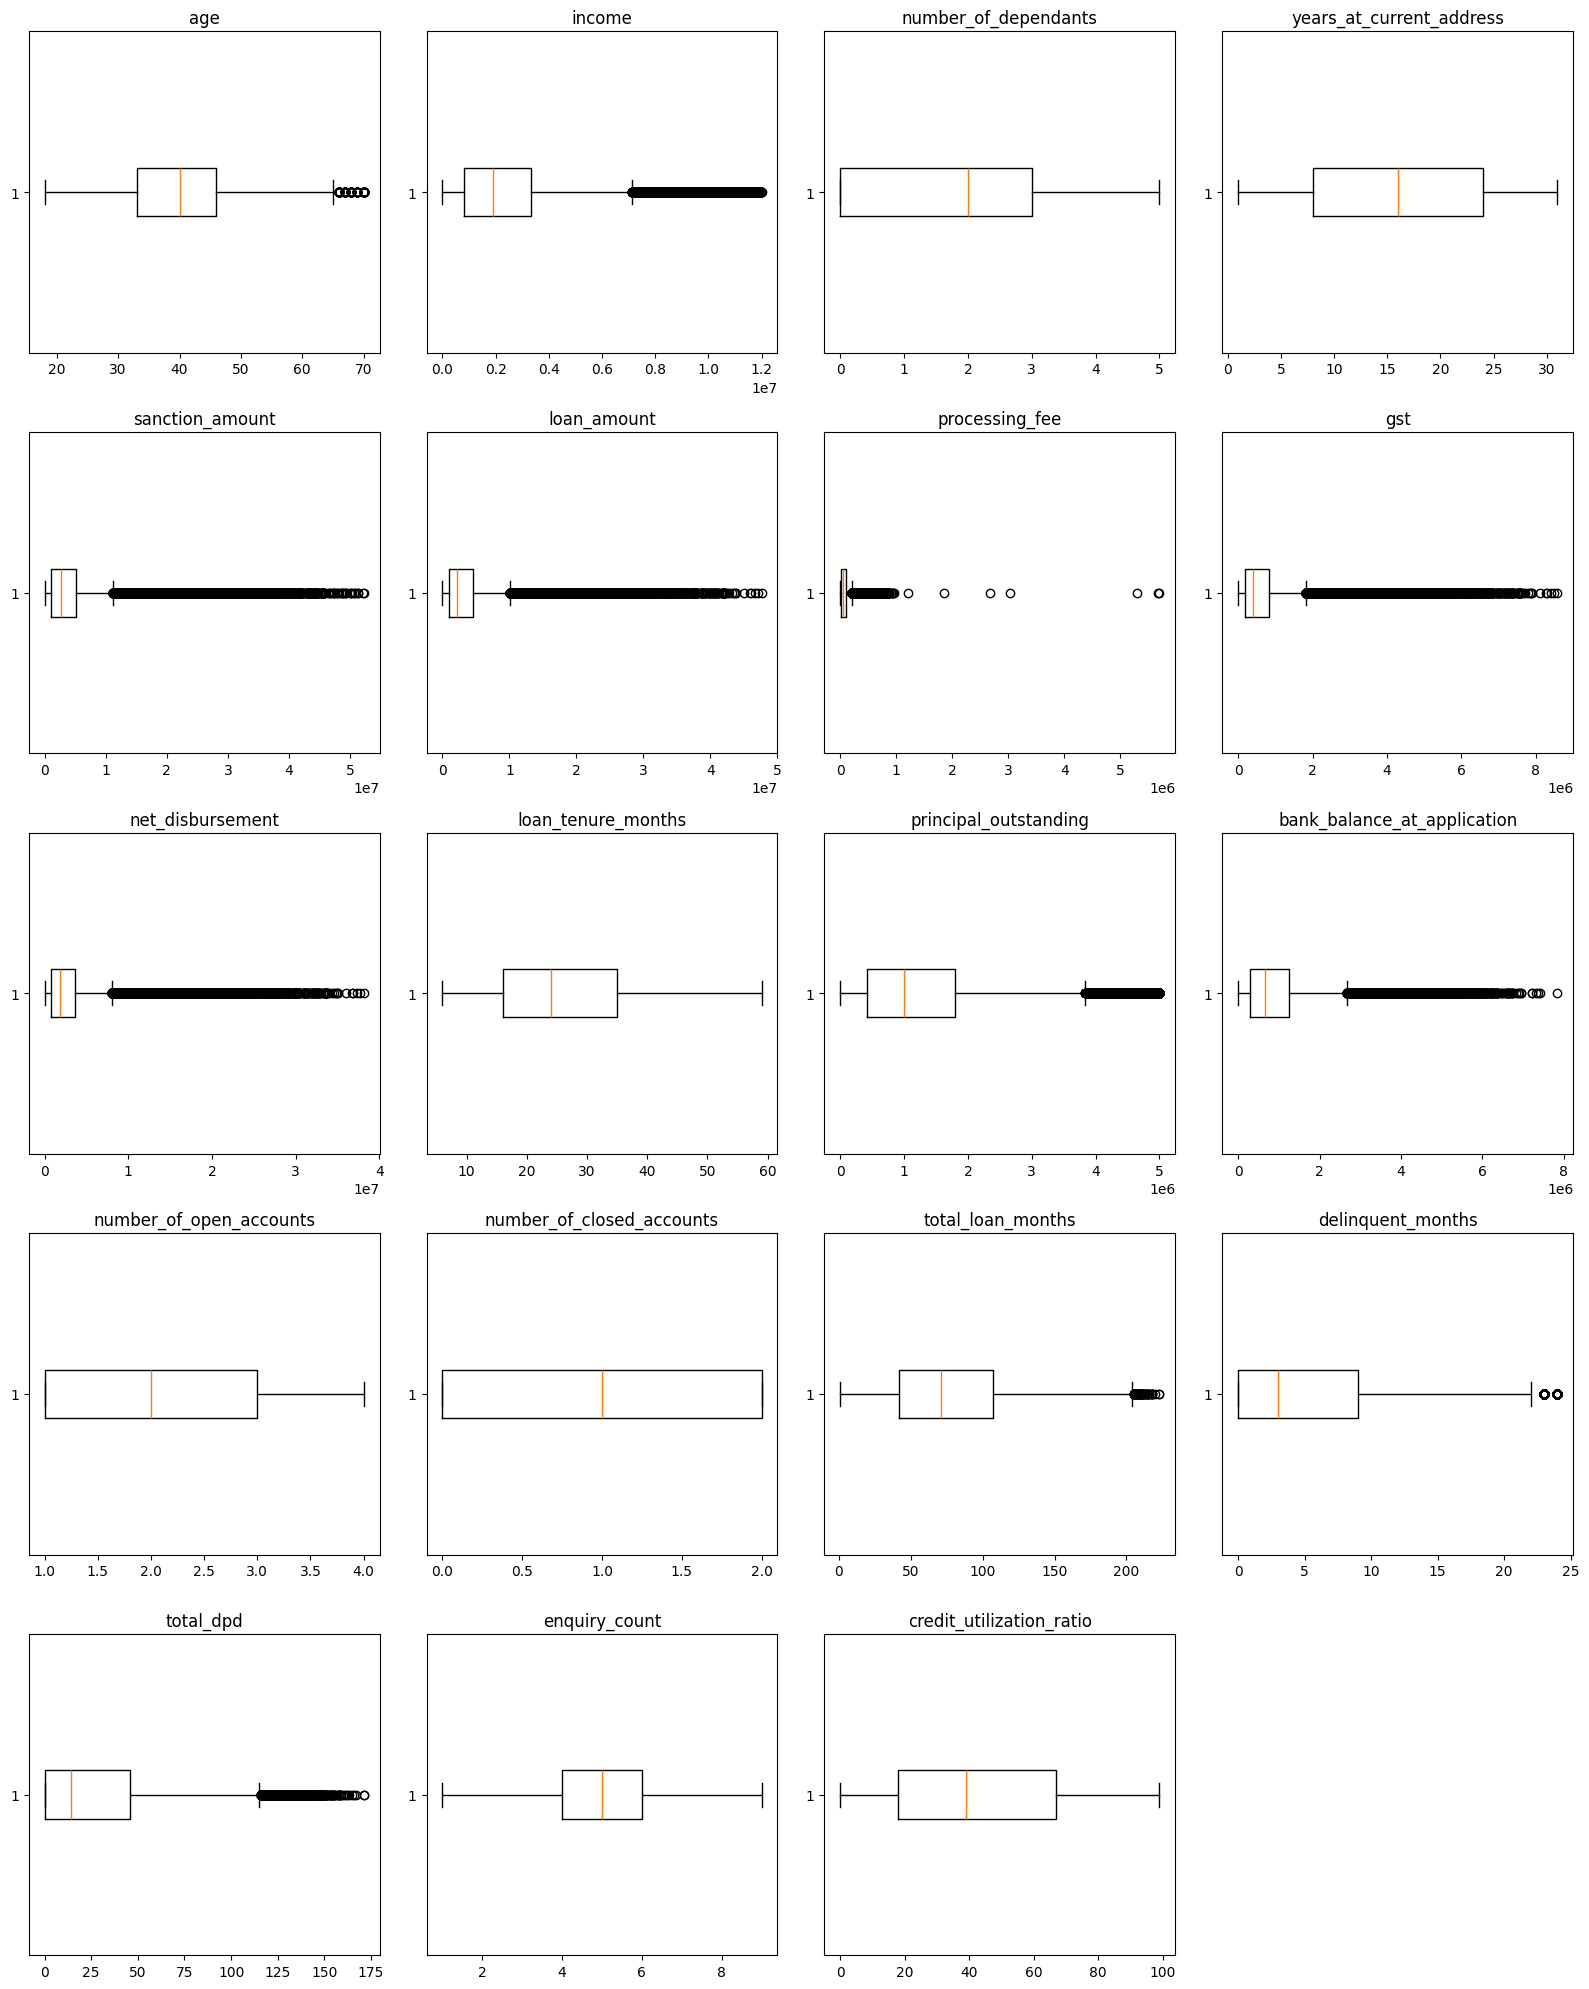

In [20]:

# Filter only numeric columns
numeric_cols = [col for col in continuous_col if pd.api.types.is_numeric_dtype(df_train[col])]

# Plot setup
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

# Plot boxplots
for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df_train[col].dropna(), vert=False)
    axes[idx].set_title(col)

# Turn off unused axes
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


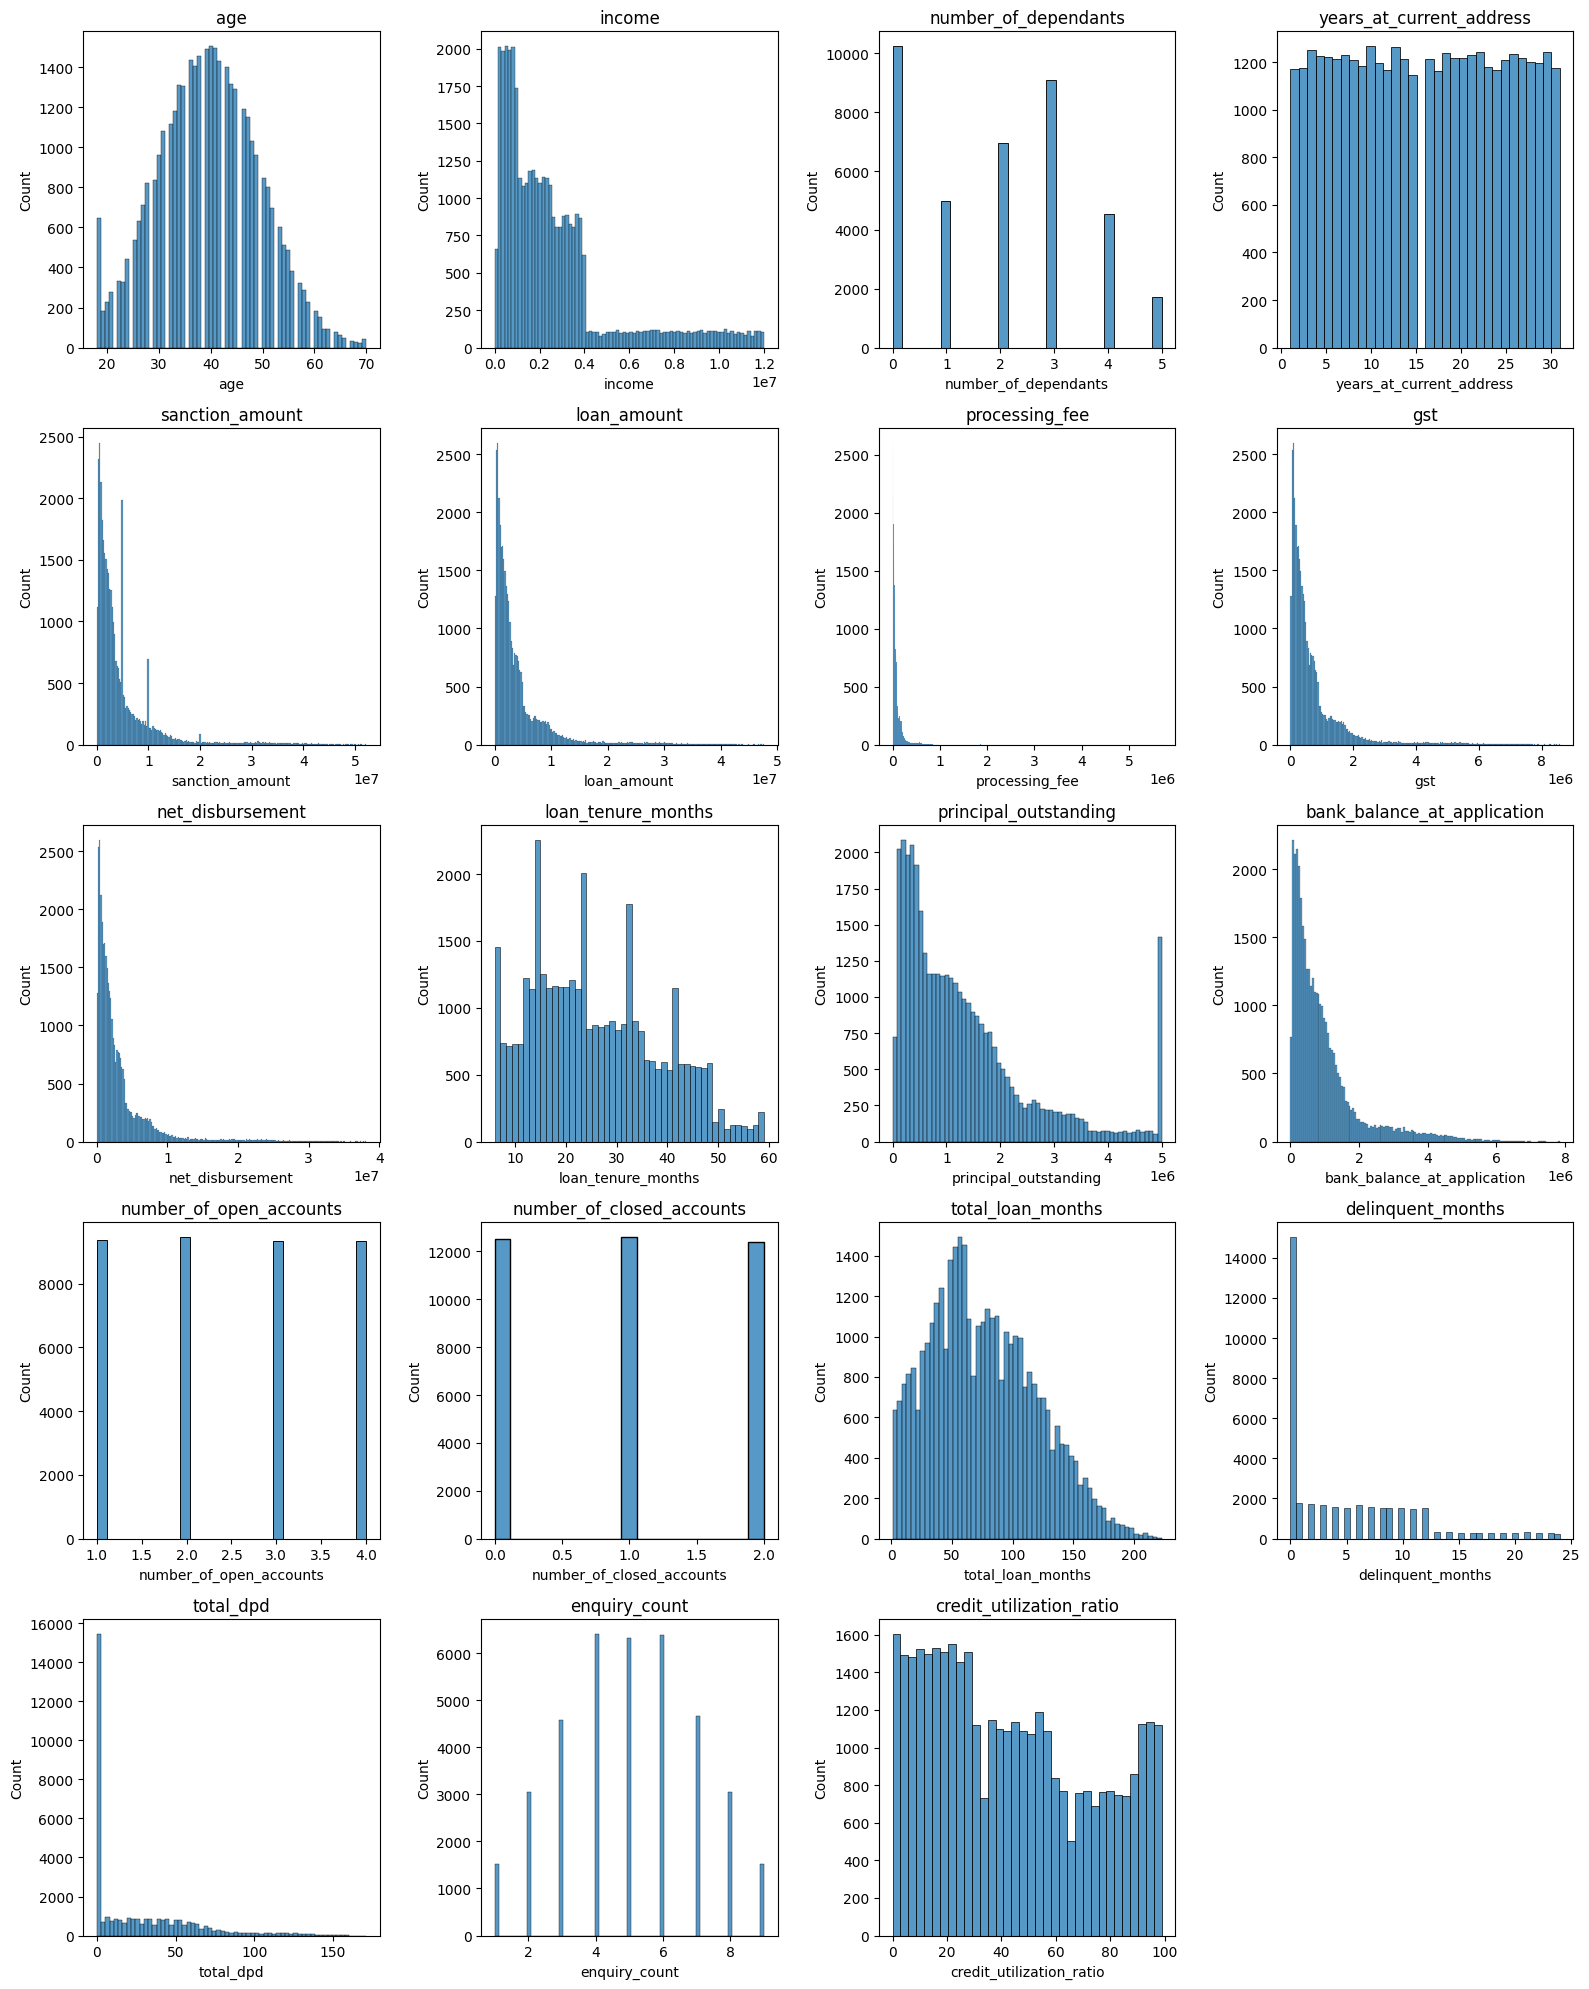

In [21]:
# Filter only numeric columns
numeric_cols = [col for col in continuous_col if pd.api.types.is_numeric_dtype(df_train[col])]

# Plot setup
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

# Plot histograms using seaborn
for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df_train, x=col, ax=axes[idx])
    axes[idx].set_title(col)

# Turn off unused axes
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [22]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.072411e+04
std      1.208307e+05
min      0.000000e+00
25%      1.918000e+04
50%      4.470000e+04
75%      9.200000e+04
max      5.698030e+06
Name: processing_fee, dtype: float64

In [23]:
df_train[(df_train.processing_fee/df_train.loan_amount) >0.03  ][["processing_fee","loan_amount"]]

,processing_fee,loan_amount
23981,2.669791e+06,2234000
9898,5.293544e+06,3626000
47089,1.858965e+06,1738000
33705,5.678021e+06,3812000
12294,5.698030e+06,4639000
28174,1.214493e+06,966000
29305,3.036378e+06,2616000


In [24]:
df_train_1= df_train[(df_train.processing_fee/df_train.loan_amount) <0.03  ].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount) >0.03  ][["processing_fee","loan_amount"]]

,processing_fee,loan_amount


In [25]:
df_test= df_test[(df_test.processing_fee/df_test.loan_amount) <0.03  ].copy()
df_test.shape

(12498, 33)

In [26]:
for col in cat_col:
    print(col,"-->",df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [27]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')

### Exploratory Data Analysis

<Axes: xlabel='age', ylabel='Density'>

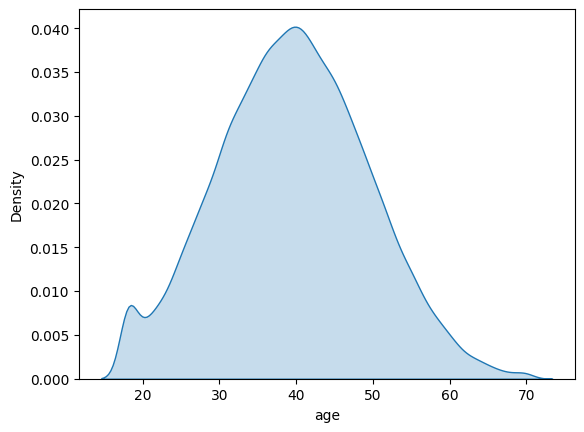

In [28]:
sns.kdeplot(df['age'],fill=True)

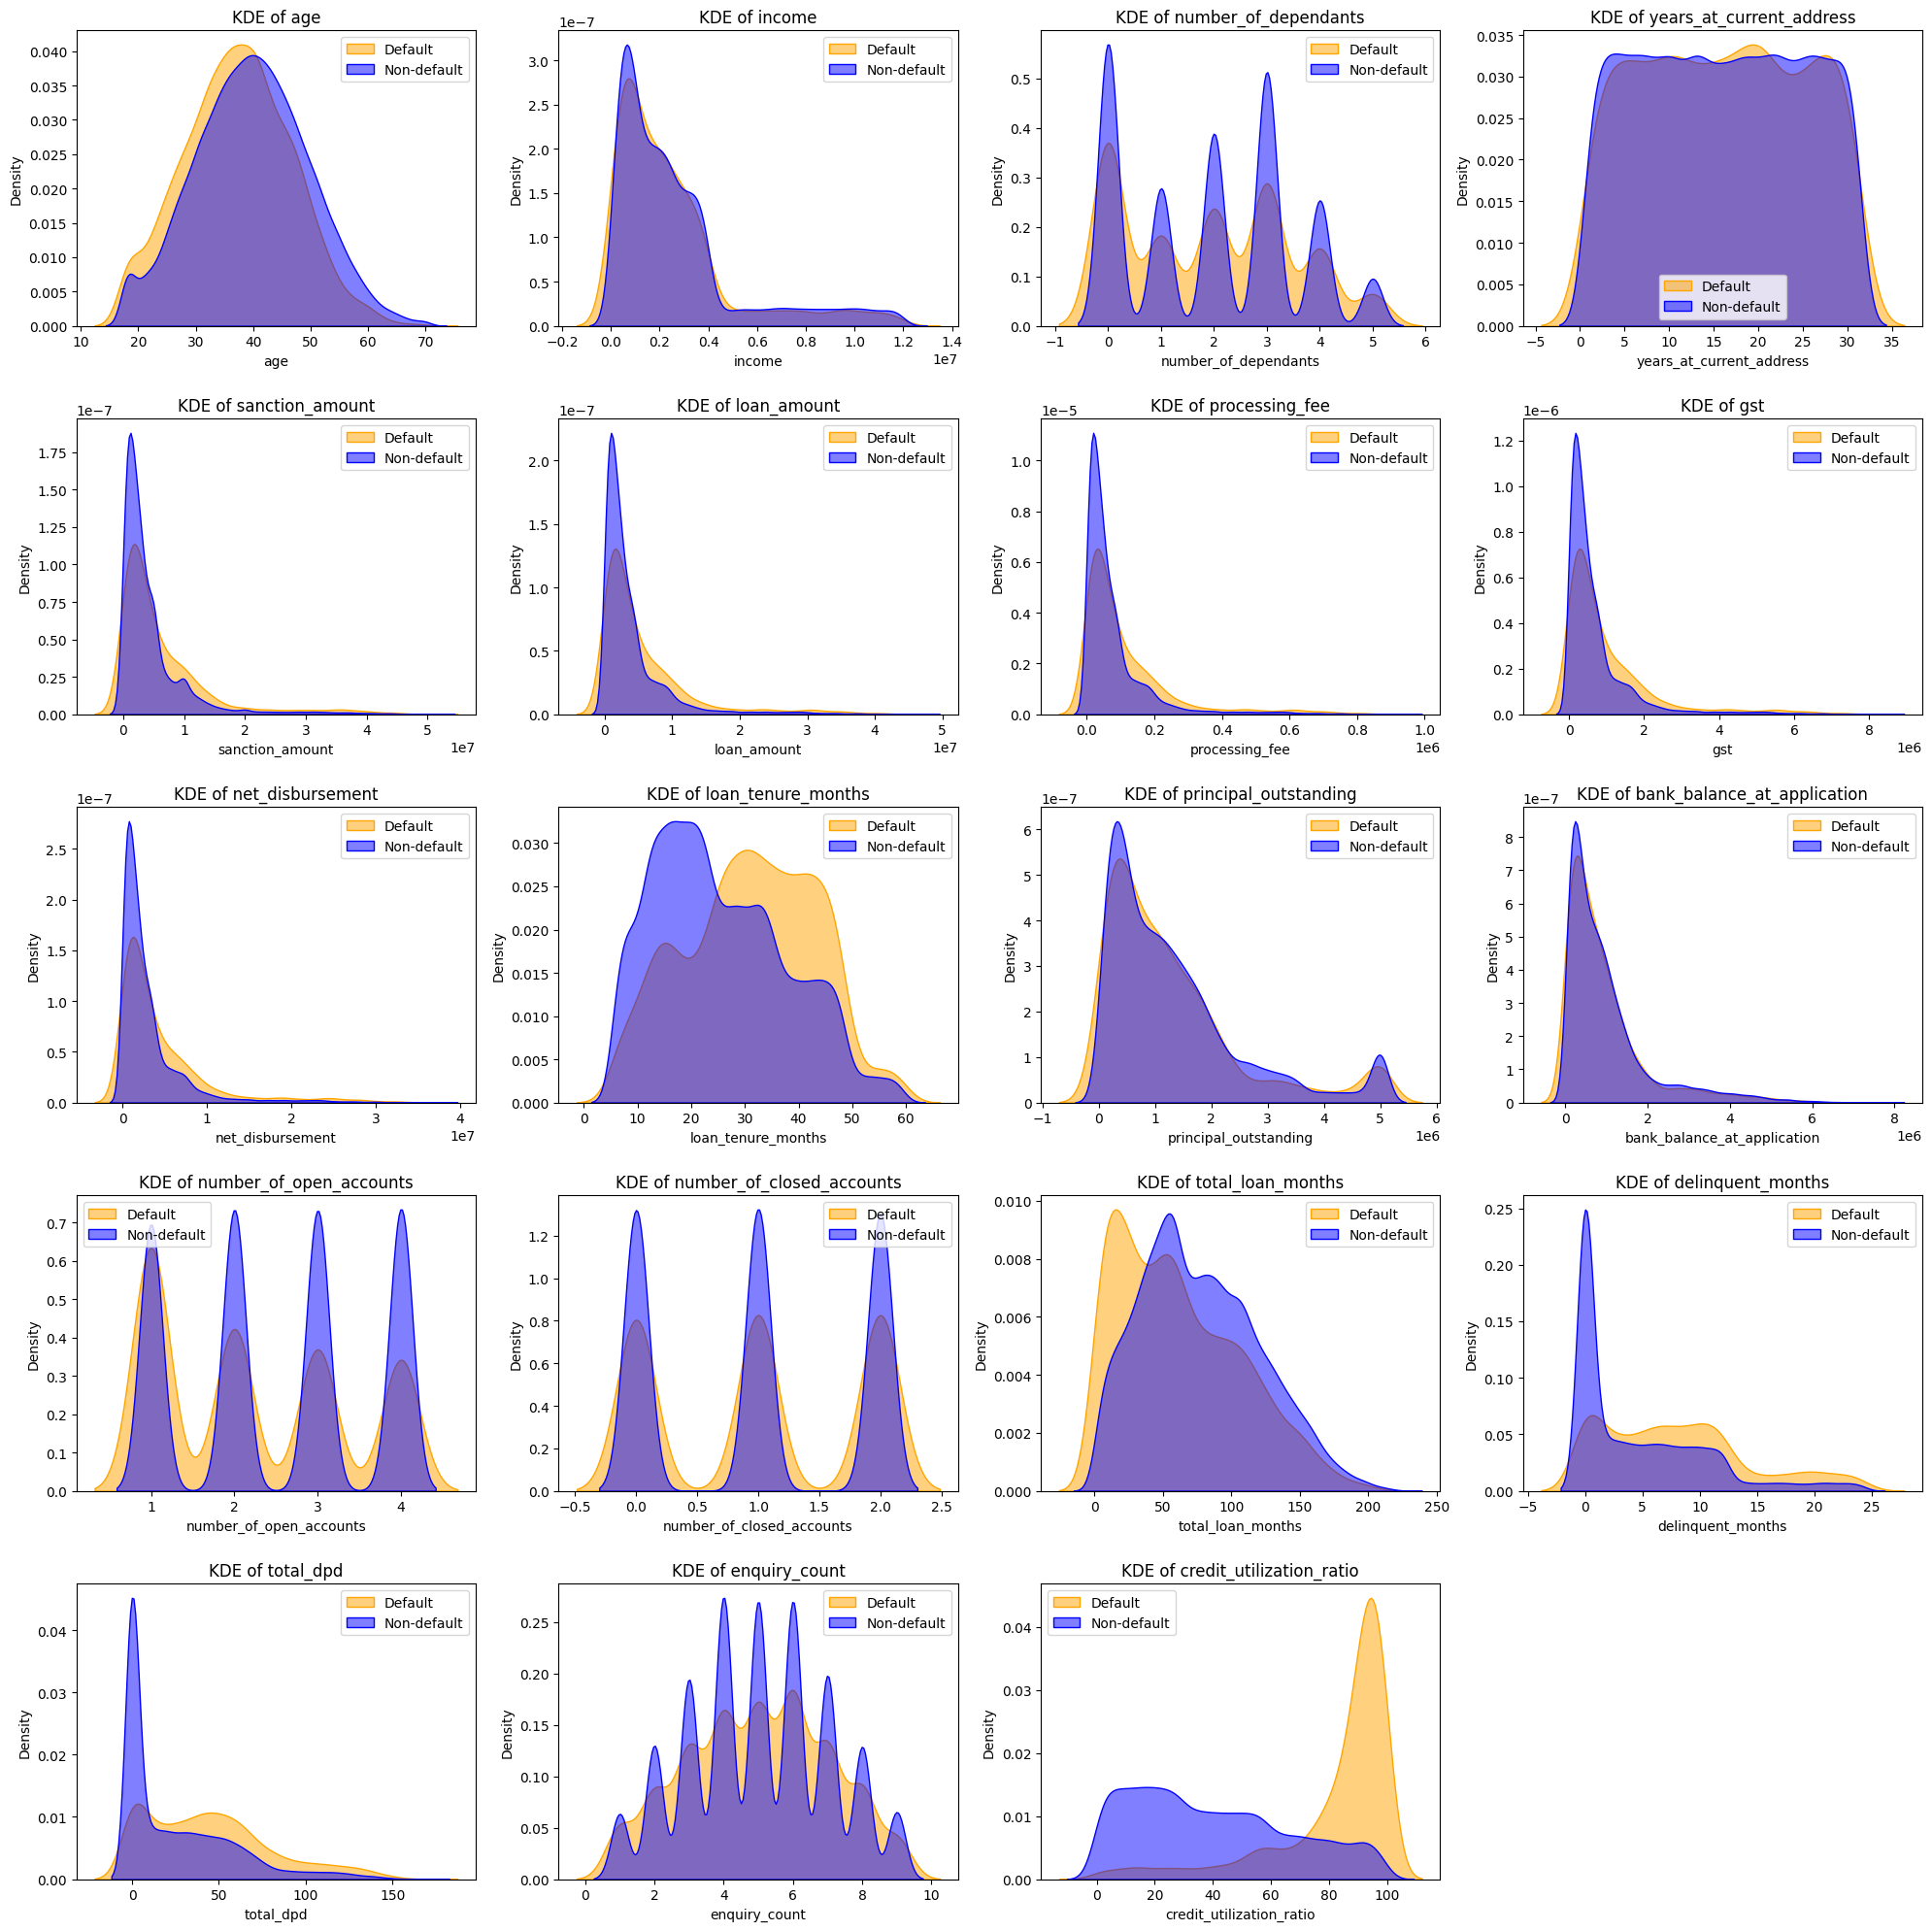

In [29]:
# Plot settings
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    
    # KDE for default = 1 (orange) and default = 0 (blue)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 1], x=col, label='Default', color='orange', fill=True, alpha=0.5)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 0], x=col, label='Non-default', color='blue', fill=True, alpha=0.5)
        
    plt.title(f'KDE of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

#### Insights
1.For ages above 45, the blue curve dominates — meaning fewer defaults are seen in this older segment.

2.Older individuals may have better financial discipline, higher stability, or lower loan exposure.

3.columns like loan_tenure_months, total_loan_months, credit_utilization_ration are going to be strong predictors

### Feature Engineering

In [30]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [31]:
df_train_1['loan_to_income'] = df_train_1['loan_amount']/df_train_1['income']
df_test['loan_to_income'] = df_test['loan_amount']/df_test['income']
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2022-12-21,2,2,70,3,27,5,12,0,1.397569
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,2020-07-15,4,0,115,0,0,9,85,0,3.240367
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,2019-08-02,4,1,144,0,0,4,72,0,3.014939
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,2020-10-31,3,2,93,0,0,4,90,0,1.098901
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,2023-08-02,4,2,152,20,105,9,53,0,1.018759


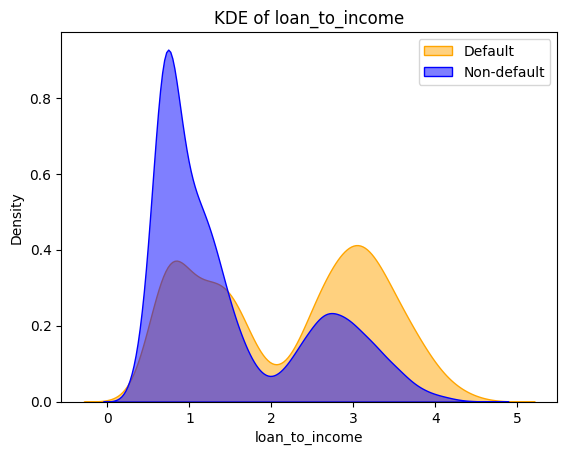

In [32]:
    # KDE for default = 1 (orange) and default = 0 (blue)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 1], x='loan_to_income', label='Default', color='orange', fill=True, alpha=0.5)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 0], x='loan_to_income', label='Non-default', color='blue', fill=True, alpha=0.5)
        
    plt.title(f'KDE of {'loan_to_income'}')
    plt.legend()

In [33]:
df_train_1['deliquency_ratio'] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(1)
df_test['deliquency_ratio'] =( df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,deliquency_ratio
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,4,2,90,6,33,8,59,0,2.896552,6.7
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,3,1,119,4,17,4,92,0,1.084080,3.4
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2,1,83,14,78,4,83,0,0.664130,16.9
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,1,1,37,0,0,5,34,0,1.095588,0.0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2,0,62,6,28,5,19,0,1.843972,9.7


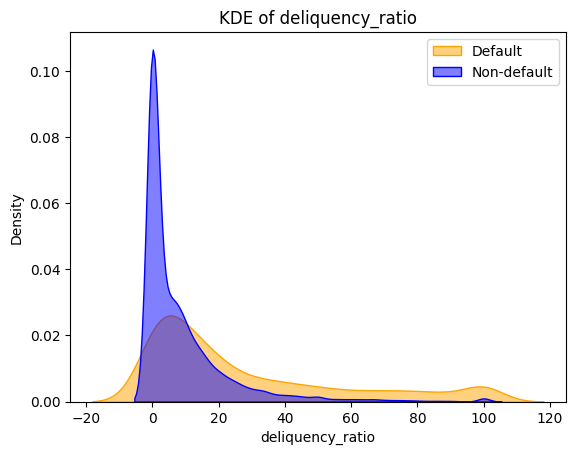

In [34]:
    # KDE for default = 1 (orange) and default = 0 (blue)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 1], x='deliquency_ratio', label='Default', color='orange', fill=True, alpha=0.5)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 0], x='deliquency_ratio', label='Non-default', color='blue', fill=True, alpha=0.5)
        
    plt.title(f'KDE of {'deliquency_ratio'}')
    plt.legend()

In [35]:
df_train_1['avg_dpd_per_deliquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd']*100/df_train_1['delinquent_months']).round(1),
    0
)
df_train_1['avg_dpd_per_deliquency'].describe()


df_test['avg_dpd_per_deliquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd']*100/df_test['delinquent_months']).round(1),
    0
)

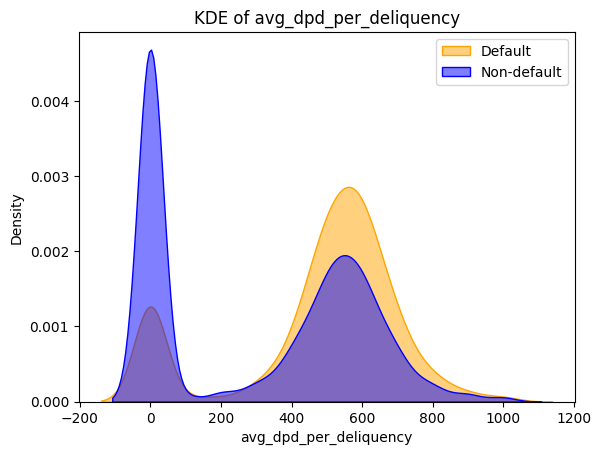

In [36]:
    # KDE for default = 1 (orange) and default = 0 (blue)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 1], x='avg_dpd_per_deliquency', label='Default', color='orange', fill=True, alpha=0.5)
    sns.kdeplot(data=df_train_1[df_train_1['default'] == 0], x='avg_dpd_per_deliquency', label='Non-default', color='blue', fill=True, alpha=0.5)
        
    plt.title(f'KDE of {'avg_dpd_per_deliquency'}')
    plt.legend()

### Feature Selection

In [37]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'deliquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [38]:
df_train_2 = df_train_1.drop(["cust_id","loan_id"],axis='columns')
df_test = df_test.drop(["cust_id","loan_id"],axis='columns')

In [39]:
df_train_3 = df_train_2.drop(['disbursal_date','installment_start_dt','income','loan_amount','total_loan_months','delinquent_months','total_dpd'],axis='columns')
df_test = df_test.drop(['disbursal_date','installment_start_dt','income','loan_amount','total_loan_months','delinquent_months','total_dpd'],axis='columns')
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'deliquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [40]:
X_train = df_train_3.drop('default',axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale =  X_train.select_dtypes(["int64","float64"]).columns
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency
count,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000
mean,0.414681,0.388476,0.499787,0.523326,0.088989,0.083030,0.083030,0.083030,0.375431,0.261931,0.123683,0.498795,0.498386,0.500410,0.437656,0.294842,0.103943,0.329463
std,0.189510,0.307163,0.297939,0.286165,0.120709,0.113437,0.113437,0.113437,0.234410,0.244515,0.133507,0.372407,0.407528,0.252997,0.296517,0.227896,0.172686,0.290336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020440,0.019100,0.019100,0.019100,0.188679,0.078179,0.034088,0.000000,0.000000,0.375000,0.181818,0.110901,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.491525,0.049536,0.045887,0.045887,0.045887,0.339623,0.194385,0.082720,0.333333,0.500000,0.500000,0.393939,0.201436,0.038000,0.433300
75%,0.538462,0.600000,0.766667,0.762712,0.097660,0.095512,0.095512,0.095512,0.547170,0.353152,0.155525,0.666667,1.000000,0.625000,0.676768,0.505510,0.131000,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
X_test = df_test.drop('default',axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
y_test.describe()

count    12498.000000
mean         0.088654
std          0.284255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df


In [43]:
calculate_vif(X_train[cols_to_scale])

C:\Users\SANJAY KUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,age,5.717145
1,number_of_dependants,2.731679
2,years_at_current_address,3.424730
3,zipcode,3.793721
4,sanction_amount,102.154763
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.142560
9,principal_outstanding,16.279407


In [44]:
features_to_drop_vif = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']
X_train_1 = X_train.drop(features_to_drop_vif,axis='columns')

In [45]:
numeric_col = X_train_1.select_dtypes(["int64","float64"]).columns
vif_df = calculate_vif(X_train_1[numeric_col])


In [46]:
selected_numeric_features_vif = vif_df
selected_numeric_features_vif

,column,VIF
0,age,5.445052
1,number_of_dependants,2.728158
2,years_at_current_address,3.408082
3,zipcode,3.771641
4,loan_tenure_months,5.984209
5,bank_balance_at_application,1.801343
6,number_of_open_accounts,4.320956
7,number_of_closed_accounts,2.350954
8,enquiry_count,6.367270
9,credit_utilization_ratio,2.916093


### Feature Selection : Categorical Variable

In [47]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098463,0.207680,-0.746312,0.081509
Education,5626,546,5080,0.171214,0.148114,0.144932,0.003348
Home,11271,1744,9527,0.546880,0.277771,0.677431,0.182303
Personal,13153,585,12568,0.183443,0.366435,-0.691918,0.126616


In [48]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4917403

In [49]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,deliquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_deliquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [50]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'deliquency_ratio',
 'avg_dpd_per_deliquency']

### Feature Encoding

In [51]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [52]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.185,0.034,0.425,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.086,0.169,0.557,False,False,False,False,True,True


In [53]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.690,0.000,0.000,True,False,False,True,False,False
199,0.192,0.623,1.000,0.727,0.637,0.000,0.000,True,False,False,True,False,False


### Model Training

#### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



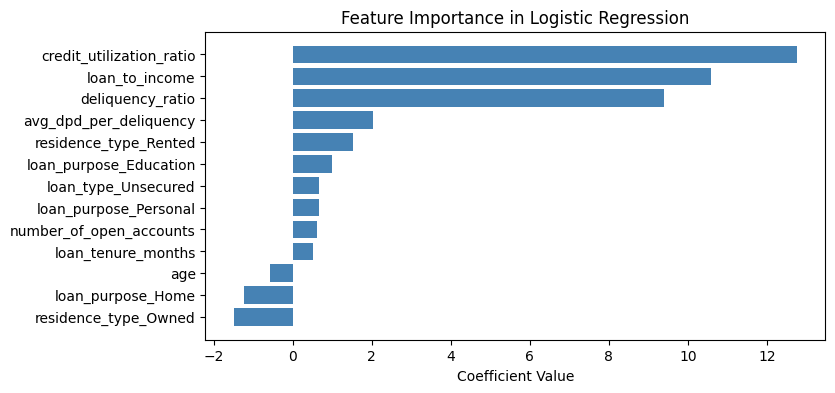

In [55]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.85      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [57]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.81      0.74      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.89      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



###### Since there is no much difference between logistic regression and random forest and xgb, I choose logistic regression for easy understandability

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [58]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': np.float64(10000.0)}
Best Score: 0.762920413115156
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



### RandomizedSearch CV for Attempt 1: XGBoost

In [59]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7930554672309524
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



#### Attempt 2
1.Logistic Regression & XGB

2.Handle Class Imbalance Using Under Sampling

In [60]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [61]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.95     11390
           1       0.53      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



### Attempt 3
Logistic Regression

Handle Class Imbalance Using SMOTE Tomek

Parameter tunning using optuna

In [62]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34228
1    34228
Name: count, dtype: int64

In [63]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [64]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [65]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-08-01 15:55:58,685] A new study created in memory with name: no-name-cd8f1f5d-0a44-468f-900e-a6f5583ef214
[I 2025-08-01 15:55:58,828] Trial 0 finished with value: 0.851660181292003 and parameters: {'C': 0.000241724575207461, 'solver': 'saga', 'tol': 0.03341630907355421, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.851660181292003.
[I 2025-08-01 15:55:58,936] Trial 1 finished with value: 0.9383420481186372 and parameters: {'C': 0.06837732705301713, 'solver': 'lbfgs', 'tol': 0.0005016512084610776, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9383420481186372.
[I 2025-08-01 15:55:59,074] Trial 2 finished with value: 0.944855271769276 and parameters: {'C': 40.22838717429751, 'solver': 'newton-cg', 'tol': 0.00011654016149478065, 'class_weight': None}. Best is trial 2 with value: 0.944855271769276.
[I 2025-08-01 15:55:59,175] Trial 3 finished with value: 0.9400594004803441 and parameters: {'C': 0.119970564202872, 'solver': 'lbfgs', 'tol': 0.000572258633674

In [66]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9448845190225169
  Params: 
    C: 3.941056096221168
    solver: newton-cg
    tol: 2.5219190475906715e-05
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [67]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-08-01 15:56:07,230] A new study created in memory with name: no-name-949a4d36-c92b-47ca-bd25-d259435f0088
[I 2025-08-01 15:56:07,726] Trial 0 finished with value: 0.9537353194451471 and parameters: {'lambda': 0.004080619838210469, 'alpha': 0.0035430752857099628, 'subsample': 0.5464129894153692, 'colsample_bytree': 0.5723893772417855, 'max_depth': 3, 'eta': 0.26352049178272174, 'gamma': 0.7922795894904422, 'scale_pos_weight': 5.226438820551541, 'min_child_weight': 5, 'max_delta_step': 4}. Best is trial 0 with value: 0.9537353194451471.
[I 2025-08-01 15:56:08,321] Trial 1 finished with value: 0.9644219448566546 and parameters: {'lambda': 0.015866302959421114, 'alpha': 0.013516112277380058, 'subsample': 0.6144904002100706, 'colsample_bytree': 0.44314160202363734, 'max_depth': 6, 'eta': 0.27439553791944277, 'gamma': 3.366520373425762, 'scale_pos_weight': 6.889189754197419, 'min_child_weight': 9, 'max_delta_step': 2}. Best is trial 1 with value: 0.9644219448566546.
[I 2025-08-01 15:

In [68]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9771043530371205
  Params: 
    lambda: 0.3092571505227621
    alpha: 0.007032991946321942
    subsample: 0.9276334707135305
    colsample_bytree: 0.9389882732897914
    max_depth: 10
    eta: 0.22796352870091752
    gamma: 0.7201183022516849
    scale_pos_weight: 1.5582096388348639
    min_child_weight: 2
    max_delta_step: 6
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.73      0.85      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.86      0.91      0.88     12498
weighted avg       0.96      0.96      0.96     12498



## Model Evaluation : ROC/AUC

In [69]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [70]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05]),
 array([0.        , 0.00090253, 0.20938628, 0.20938628, 0.22563177]),
 array([       inf, 0.99999994, 0.9987427 , 0.99873567, 0.99849732]))

In [71]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9829857402306792)

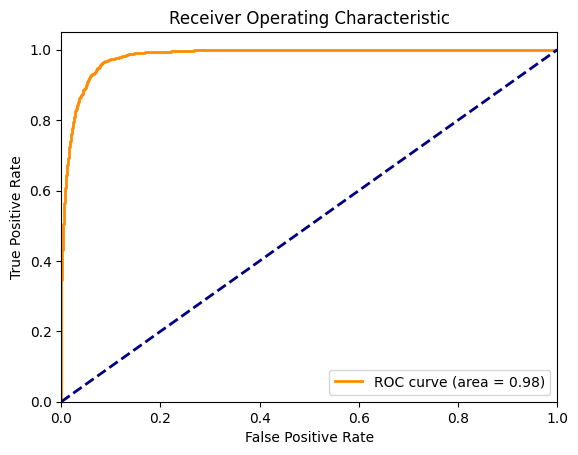

In [72]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [73]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.765
199,0,0.141


In [74]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.765,8
199,0,0.141,7


In [75]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.493
std        0.185
min        0.210
25%        0.328
50%        0.479
75%        0.660
max        0.820
Name: Default Probability, dtype: float64

In [76]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_13916\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,1.000,1249.000
6,6,0.005,0.033,2.000,1247.000
7,7,0.033,0.209,17.000,1233.000
8,8,0.210,0.820,170.000,1080.000
9,9,0.821,1.000,918.000,332.000


In [77]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,9,0.821,1.000,918.000,332.000
1,8,0.210,0.820,170.000,1080.000
2,7,0.033,0.209,17.000,1233.000
3,6,0.005,0.033,2.000,1247.000
4,5,0.001,0.005,1.000,1249.000
5,4,0.000,0.001,0.000,1250.000
6,3,0.000,0.000,0.000,1249.000
7,2,0.000,0.000,0.000,1250.000
8,1,0.000,0.000,0.000,1250.000
9,0,0.000,0.000,0.000,1250.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [78]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9829857402306792
Gini Coefficient: 0.9659714804613584


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

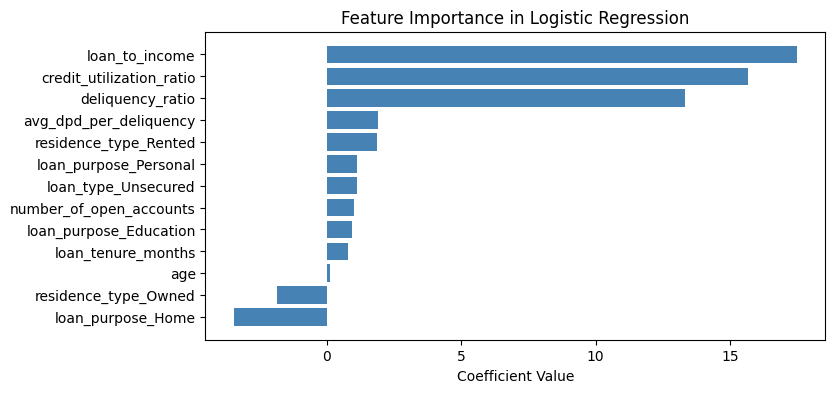

In [79]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [80]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.690,0.000,0.000,True,False,False,True,False,False


In [81]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [82]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [83]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [84]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [85]:
final_model.coef_,final_model.intercept_

(array([[ 0.11433298,  0.77532518,  1.0234085 , 15.67282379, 17.49701008,
         13.30458939,  1.9198919 , -1.84566301,  1.86522061,  0.92275497,
         -3.45919515,  1.1147676 ,  1.1147676 ]]),
 array([-20.57561479]))

In [86]:
print("Input DataFrame columns:", X_train_encoded.columns.tolist())
print("Columns expected to scale:", cols_to_scale)


Input DataFrame columns: ['age', 'loan_tenure_months', 'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned', 'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal', 'loan_type_Unsecured']
Columns expected to scale: Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')
